In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("dataset3.csv")

In [3]:
df

,Weight (kg),Age (years),Hours_Exercise_per_week,Height (cm)
0,70,25,5,175
1,60,22,2,165
2,80,30,3,180
3,55,20,1,160
4,90,35,4,185
5,65,28,2,170
6,75,26,6,178
7,85,33,3,182


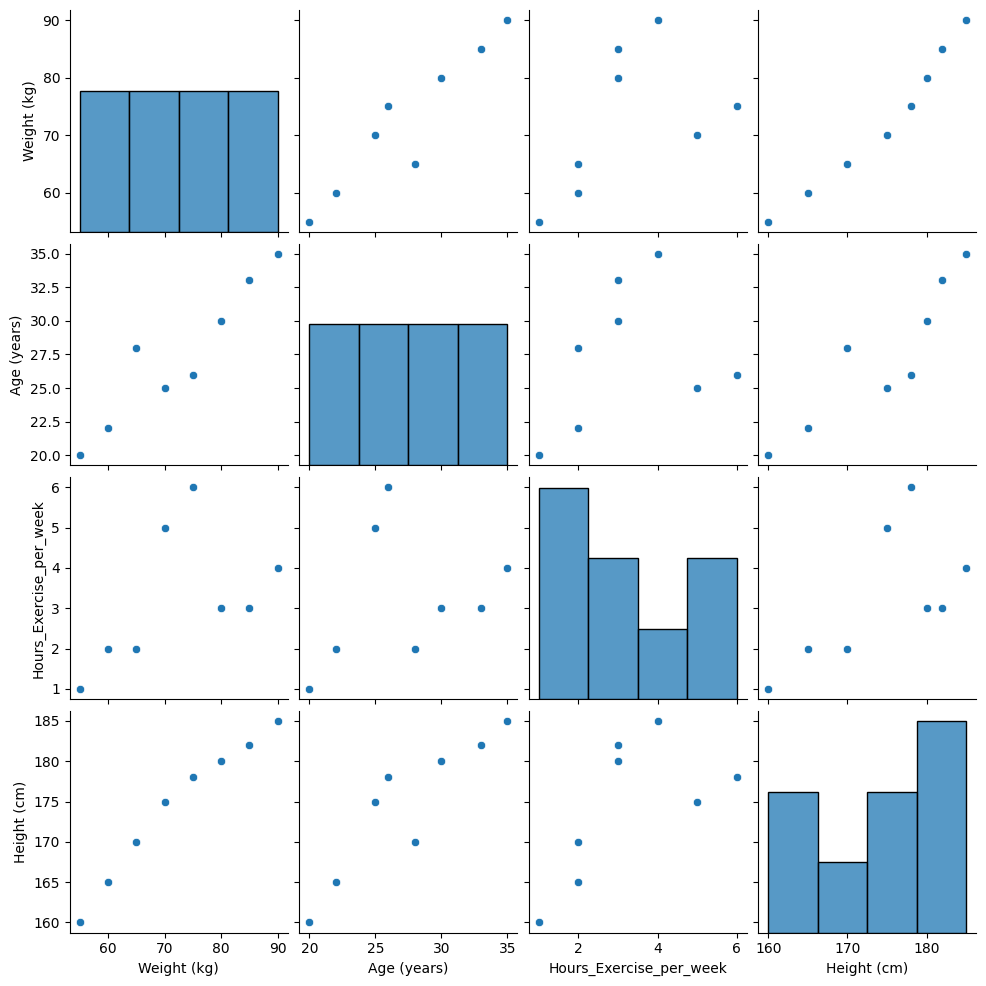

In [4]:
import seaborn as ss
ss.pairplot(df)

In [5]:
df.isnull().sum()

Weight (kg)                0
Age (years)                0
Hours_Exercise_per_week    0
Height (cm)                0
dtype: int64

In [6]:
df.corr()

,Weight (kg),Age (years),Hours_Exercise_per_week,Height (cm)
Weight (kg),1.000000,0.939999,0.524142,0.982033
Age (years),0.939999,1.000000,0.301516,0.906056
Hours_Exercise_per_week,0.524142,0.301516,1.000000,0.641913
Height (cm),0.982033,0.906056,0.641913,1.000000


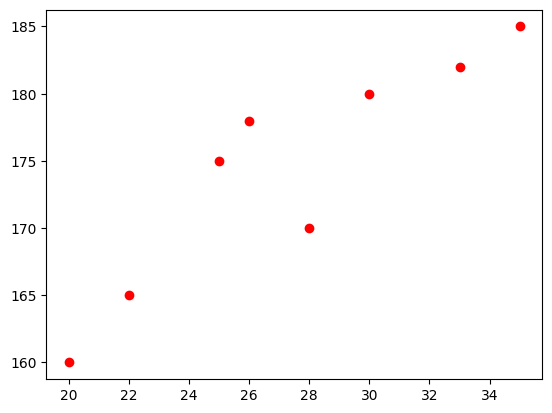

In [8]:
#visulation of datapoints more closely

plt.scatter(df['Age (years)'],df['Height (cm)'],color='r')

In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
x.head()

,Weight (kg),Age (years),Hours_Exercise_per_week
0,70,25,5
1,60,22,2
2,80,30,3
3,55,20,1
4,90,35,4


In [12]:
y.head()

0    175
1    165
2    180
3    160
4    185
Name: Height (cm), dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

# Independent features (X) ani dependent feature (y)
X = df[['Weight (kg)', 'Age (years)', 'Hours_Exercise_per_week']]
y = df['Height (cm)']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
print(df.columns)


Index(['Weight (kg)', 'Age (years)', 'Hours_Exercise_per_week', 'Height (cm)'], dtype='object')


<Axes: xlabel='Age (years)', ylabel='Weight (kg)'>

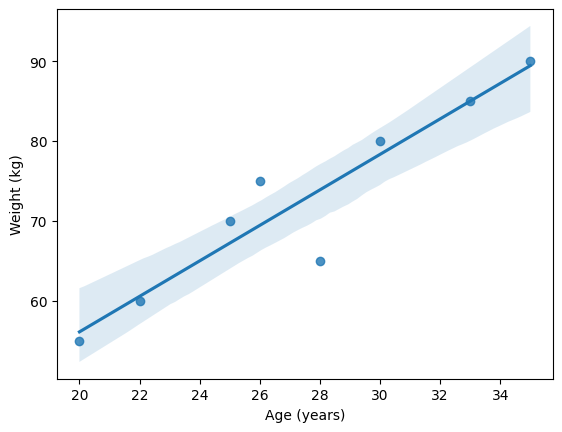

In [23]:
import seaborn as ss
ss.regplot(x=df['Age (years)'],y=df['Weight (kg)'])

In [27]:
from sklearn.preprocessing import StandardScaler


In [30]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
Y_test=scaler.fit_transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()

In [32]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
from sklearn.model_selection import cross_val_score
validation_Score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [34]:
validation_Score

array([ -5.05401662,  -4.78444444, -13.        ])

In [36]:
##predition
y_pred=regression.predict(X_test)

C:\Users\rajpu\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [37]:
y_pred

array([807.43446821, 840.39217817])

In [38]:
##preformance matric

from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rsms=np.sqrt(mse)
print(mse)
print(mae)
print(rsms)

431073.8592518499
656.4133231930541
656.5621518575754


In [ ]:
##assumtion

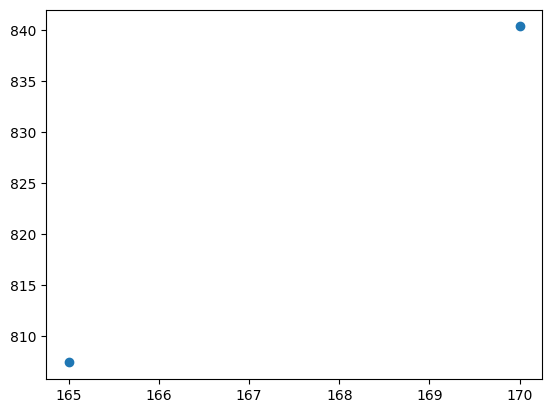

In [40]:
plt.scatter(y_test,y_pred)

In [41]:
residuals=y_test,y_pred
print(residuals)

(1    165
5    170
Name: Height (cm), dtype: int64, array([807.43446821, 840.39217817]))


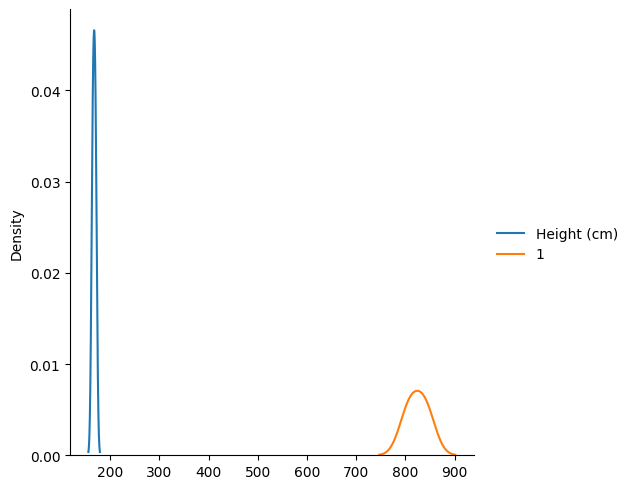

In [42]:
##plot this residuals
ss.displot(residuals,kind='kde')

ValueError: x and y must be the same size

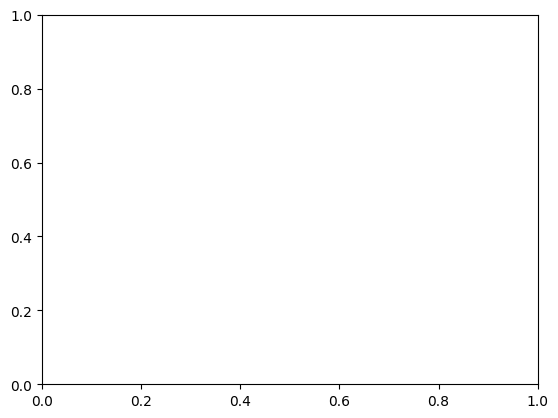

In [45]:
#create a scatter plot to predicition and residuals
plt.scatter(y_pred,residuals)